# Titanic Survival Analysis: Ticket Class to Survival Exploration

## Project Overview

This notebook explores the Kaggle Titanic dataset to analyze survival patterns among passengers. The primary goal is to identify key features that influenced survival rates and build insights for predictive modeling.

**Dataset**: Titanic passenger data from Kaggle competition

**Specific Notebook Objective**: Exploratory Data Analysis (EDA) focusing on ticket-class-based survival patterns

---

## 1. Data Loading and Initial Exploration

First, let's load the training dataset and examine its structure.

In [20]:
from datetime import date, time, datetime, timedelta
from typing import Any

import pandas as pd
from matplotlib.axes import Axes
from numpy import dtype, generic
from pandas import DataFrame, Series, Period, Interval, CategoricalDtype
import matplotlib.pyplot as plt
from pandas._libs.tslibs import BaseOffset
from pandas.core.dtypes.base import ExtensionDtype

from src.constants import PCLASS_HEADER, SURVIVED_HEADER


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Observations

The dataset contains 891 passengers with the following key features:
- **Survived**: Target variable (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

---

## 2. Visualization: Survival Rate by Ticket Class
Now let's visualize the survival rates across ticket class to identify patterns.


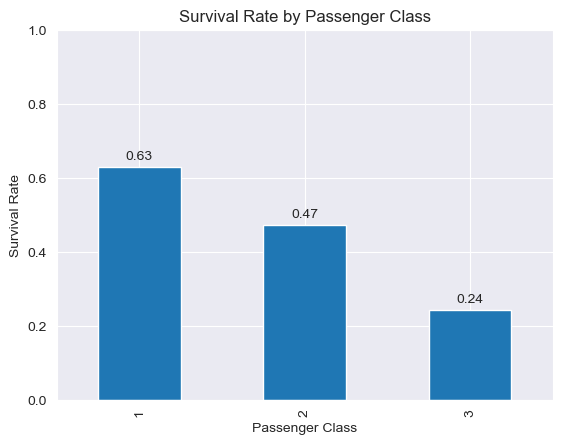

In [21]:
pclass_survival_df: DataFrame = titanic_training_df[[SURVIVED_HEADER, PCLASS_HEADER]].copy()

survival_by_pclass_group = pclass_survival_df.groupby(PCLASS_HEADER, observed=True)[SURVIVED_HEADER].mean()
survival_by_pclass_bar_chart: Axes = survival_by_pclass_group.plot(kind="bar")

survival_by_pclass_bar_chart.set_xlabel("Passenger Class")

survival_by_pclass_bar_chart.set_ylabel("Survival Rate")
survival_by_pclass_bar_chart.set_ybound(0, 1)

survival_by_pclass_bar_chart.set_title("Survival Rate by Passenger Class")

for container in survival_by_pclass_bar_chart.containers:
    survival_by_pclass_bar_chart.bar_label(container, fmt='%.2f', padding=3)  # pyright: ignore [reportArgumentType]

plt.show()

### Key Insight: Higher Ticket Class Had Higher Survival Rate

Passengers with first class tickets have higher chance of survival than passengers with lower class of tickets.

---

## 3. Alternative Visualizations

Let's explore different methods to visualize the relationship between ticket class and survival.

### Survival Rate Bar Chart

This chart shows the porpotion of survivors within each ticket class.

Text(0.5, 1.0, 'Survival Rate and Passenger Count by Passenger Class')

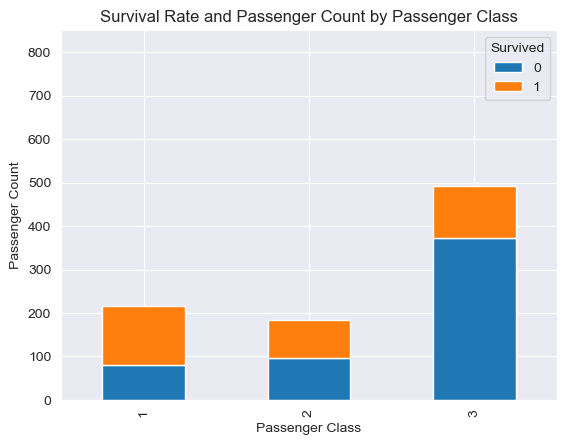

In [24]:
survival_rate_bar_chart: Axes = pclass_survival_df.groupby([PCLASS_HEADER, SURVIVED_HEADER], observed=True).size().unstack().plot(kind='bar', stacked=True)

survival_rate_bar_chart.set_xlabel("Passenger Class")

survival_rate_bar_chart.set_ylabel("Passenger Count")
survival_rate_bar_chart.set_ybound(0, 850)

survival_rate_bar_chart.set_title("Survival Rate and Passenger Count by Passenger Class")

---

## 5. Summary and Next Steps

### Key Findings

1. **Ticket Class is an important factor in survival**: 1st class passengers survived around 66% percent of the time.
2. **Most passengers wer third class**: The third class had the most passengers, but lowest survival rates of around 25%.

### Recommended Next Steps

1. Examine interactions between survival and sex.